In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#fetching data from my drive
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\Downloads\dataset1-master\dataset1-master\titanic_train.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
#getting information about data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# describeing data mean ,standard deviation etc
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
# checking for no of rows and columns
data.shape

(891, 12)

In [6]:
#checking for null values 
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#checking skewness
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [8]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

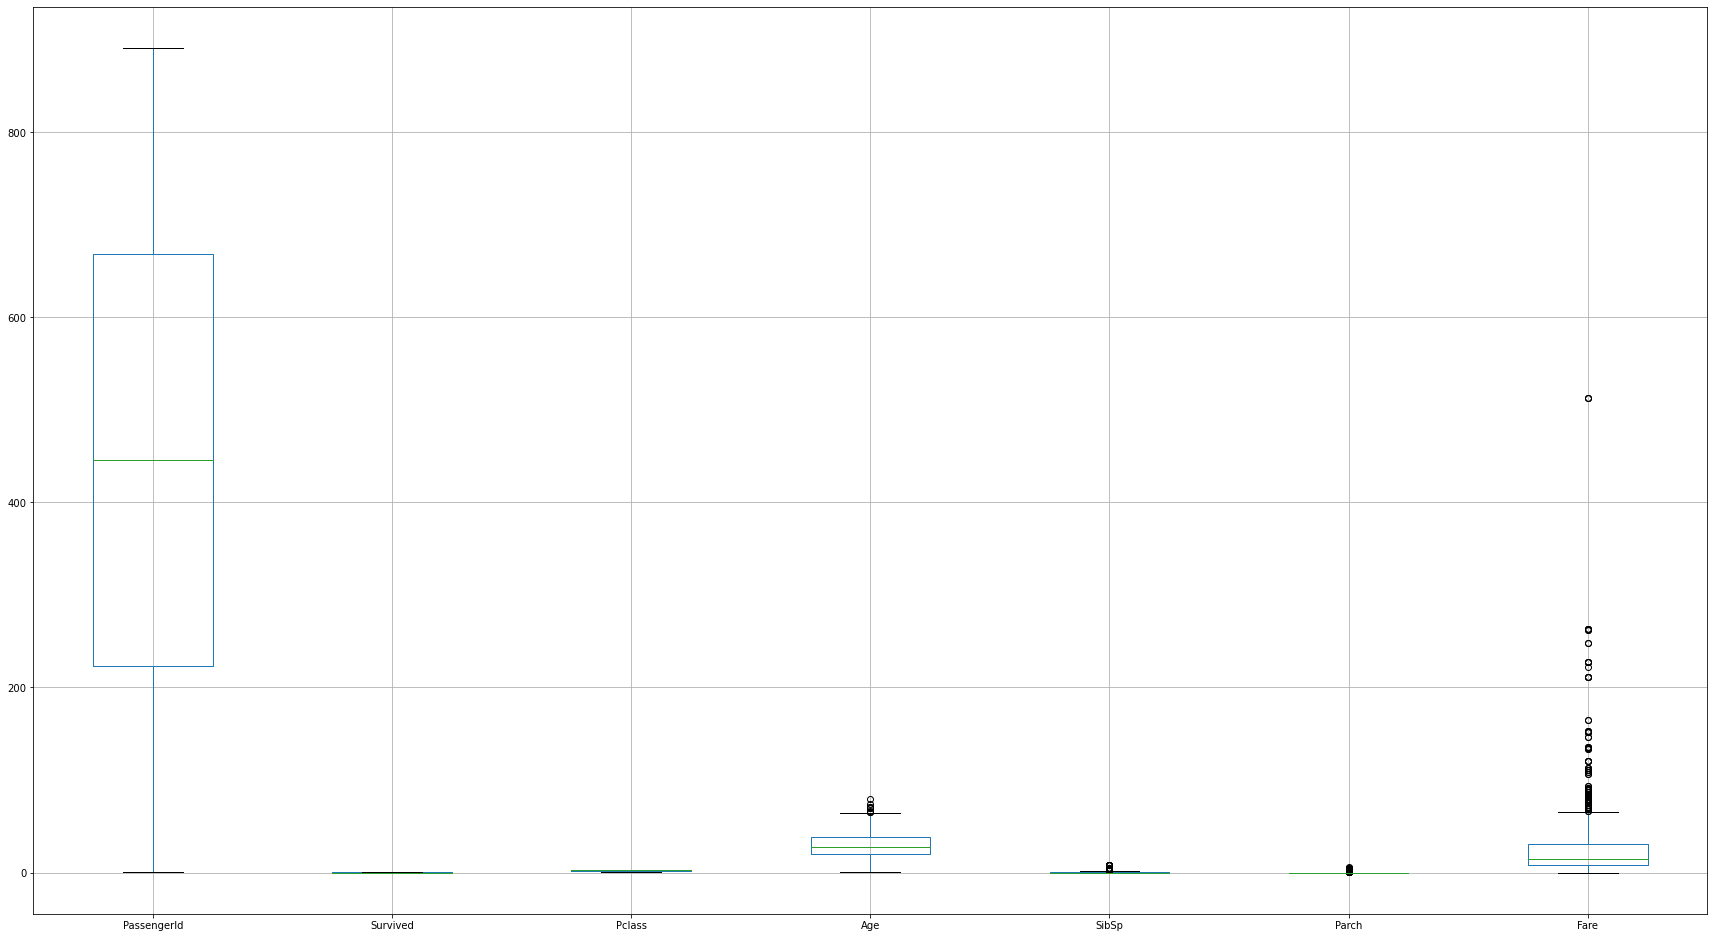

In [9]:
#for indentifying outliers
data.boxplot(figsize=[30,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [10]:
#data is in form of text changeing to int
pd.get_dummies(data['Sex'].head())

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [11]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head(5)

male
0     1
1     0
2     0
3     0
4     1

In [12]:
##data is in form of text changeing to int
pd.get_dummies(data['Embarked'])

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]

In [13]:
d=pd.get_dummies(data['Embarked'])
d

C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]

In [14]:
#join data with the orignal one
data1=pd.concat([data,d,sex],axis=1)

In [15]:
data1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  C  Q  S  male  
0        0         A/5 21171   7.2500   NaN        S  0  0  1     1  
1        0          PC 17599  71.2833   C85        C  1  0  0     0  
2        0  STON/O2. 3101282   7.9250   NaN        S  0  0  1     0  
3        0            113803  53.1000  C123        S  0  0  1     0  
4        0            373450   8.0500   NaN        S  0  0  1     1  
..     ...               ...      ...   ...      ... .. .. ..   ...  
886      0            211536  13.0000   NaN        S  0  0  1     1  
887      0            112053  30.0000   B42        S  0  0  1     0  
888      2        W./C. 6607  23.4500   NaN        S  0  0  1     0  
889      0            111369  30.0000  C148        C  1  0  0     1  
890      0            370376   7.7500   NaN        Q  0  1  0     1  

[891 rows x 16 columns]

In [16]:
#deleting the data 
data1.drop(['Pclass','Embarked','PassengerId','Sex','Name','Ticket'],axis=1,inplace=True)

In [17]:
data1

Survived   Age  SibSp  Parch     Fare Cabin  C  Q  S  male
0           0  22.0      1      0   7.2500   NaN  0  0  1     1
1           1  38.0      1      0  71.2833   C85  1  0  0     0
2           1  26.0      0      0   7.9250   NaN  0  0  1     0
3           1  35.0      1      0  53.1000  C123  0  0  1     0
4           0  35.0      0      0   8.0500   NaN  0  0  1     1
..        ...   ...    ...    ...      ...   ... .. .. ..   ...
886         0  27.0      0      0  13.0000   NaN  0  0  1     1
887         1  19.0      0      0  30.0000   B42  0  0  1     0
888         0   NaN      1      2  23.4500   NaN  0  0  1     0
889         1  26.0      0      0  30.0000  C148  1  0  0     1
890         0  32.0      0      0   7.7500   NaN  0  1  0     1

[891 rows x 10 columns]

In [18]:
data1.isna().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
C             0
Q             0
S             0
male          0
dtype: int64

In [81]:
data1['Age'] = data1['Age'].fillna(data1['Age'].mean())

In [19]:
#data1.dropna(inplace=True)

In [82]:
data1

Survived   Age  SibSp  Parch     Fare  C  Q  S  male
1           1  38.0      1      0  71.2833  1  0  0     0
3           1  35.0      1      0  53.1000  0  0  1     0
6           0  54.0      0      0  51.8625  0  0  1     1
10          1   4.0      1      1  16.7000  0  0  1     0
11          1  58.0      0      0  26.5500  0  0  1     0
..        ...   ...    ...    ...      ... .. .. ..   ...
871         1  47.0      1      1  52.5542  0  0  1     0
872         0  33.0      0      0   5.0000  0  0  1     1
879         1  56.0      0      1  83.1583  1  0  0     0
887         1  19.0      0      0  30.0000  0  0  1     0
889         1  26.0      0      0  30.0000  1  0  0     1

[185 rows x 9 columns]

In [84]:
data1.drop(['Cabin'],axis=1,inplace=False)

KeyError: "['Cabin'] not found in axis"

In [121]:
data1

Survived   Age  SibSp  Parch     Fare  C  Q  S  male
1           1  38.0      1      0  71.2833  1  0  0     0
3           1  35.0      1      0  53.1000  0  0  1     0
6           0  54.0      0      0  51.8625  0  0  1     1
10          1   4.0      1      1  16.7000  0  0  1     0
11          1  58.0      0      0  26.5500  0  0  1     0
..        ...   ...    ...    ...      ... .. .. ..   ...
871         1  47.0      1      1  52.5542  0  0  1     0
872         0  33.0      0      0   5.0000  0  0  1     1
879         1  56.0      0      1  83.1583  1  0  0     0
887         1  19.0      0      0  30.0000  0  0  1     0
889         1  26.0      0      0  30.0000  1  0  0     1

[185 rows x 9 columns]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

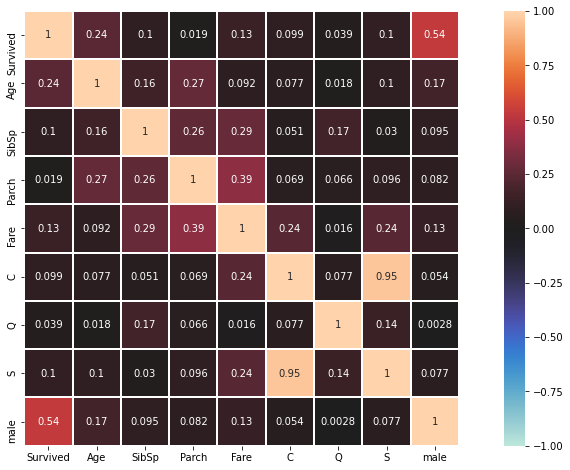

In [87]:
#identifying the corelation 
df_corr =data1.corr().abs()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

In [88]:
#splitting data in x and y
y=data1['Survived']

x=data1.drop(columns=['Survived'])

In [89]:
x

Age  SibSp  Parch     Fare  C  Q  S  male
1    38.0      1      0  71.2833  1  0  0     0
3    35.0      1      0  53.1000  0  0  1     0
6    54.0      0      0  51.8625  0  0  1     1
10    4.0      1      1  16.7000  0  0  1     0
11   58.0      0      0  26.5500  0  0  1     0
..    ...    ...    ...      ... .. .. ..   ...
871  47.0      1      1  52.5542  0  0  1     0
872  33.0      0      0   5.0000  0  0  1     1
879  56.0      0      1  83.1583  1  0  0     0
887  19.0      0      0  30.0000  0  0  1     0
889  26.0      0      0  30.0000  1  0  0     1

[185 rows x 8 columns]

In [90]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 185, dtype: int64

In [91]:
#training the data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [92]:
#agorithm use to predict the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [93]:
y_pred=log_reg.predict(x_test)

In [94]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.723404255319149

In [95]:
#agorithm use to predict the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

In [96]:
print(accuracy_score(y_test,predrf))

0.7021276595744681


In [97]:
print(confusion_matrix(y_test,predrf))

[[ 5 10]
 [ 4 28]]


In [98]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.74      0.88      0.80        32

    accuracy                           0.70        47
   macro avg       0.65      0.60      0.61        47
weighted avg       0.68      0.70      0.68        47



In [99]:
#agorithm use to predict the model
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
ad_pred = svr.predict(x_test)

In [100]:
print(accuracy_score(y_test,predrf))

0.7021276595744681


In [101]:
#use of matrix
print(confusion_matrix(y_test,predrf))

[[ 5 10]
 [ 4 28]]


In [102]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.74      0.88      0.80        32

    accuracy                           0.70        47
   macro avg       0.65      0.60      0.61        47
weighted avg       0.68      0.70      0.68        47



In [103]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(log_reg,x,y,cv=5)
print(scr.mean())

0.745945945945946


In [104]:
probes = rf.predict_proba(x_test)


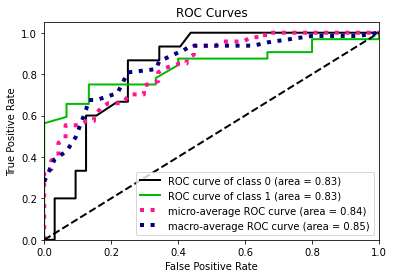

In [105]:
#roc curve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,probes)
plt.show()

In [106]:
scr = cross_val_score(rf,x,y,cv=5)
print(scr.mean())

0.745945945945946


In [107]:
scr = cross_val_score(svr,x,y,cv=5)
print(scr.mean())

-0.20794497029658693


In [108]:
#using dtc for analysis of output
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

In [109]:
#training output
clf.score(x_train,y_train)

1.0

In [110]:
y_pred=clf.predict(x_test)

In [111]:
clf.score(x_test,y_test)

0.7446808510638298

In [112]:
scr = cross_val_score(clf,x,y,cv=5)
print(scr.mean())

0.7675675675675676


In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
#gridsearch cv
parameters={'n_estimators':[100,200],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9],
           'criterion':['gini','entropy']}

In [115]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [116]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [117]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [119]:
mod = RandomForestClassifier(criterion='gini',max_depth=4,max_features='sqrt',n_estimators=200)

In [120]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.7021276595744681


In [122]:
import pickle

from sklearn import model_selection
filename = 'titanic.sav'
pickle.dump(data, open(filename, 'wb'))